In [63]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("C:/users/memdp/PYTHON_CODE/datasets_sql")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

In [64]:
# Create functions that will be used frequently

def bar_plot_basepay_id(dataframe):
    sns.set(rc={'figure.figsize':(15,10)})
    sns.barplot(x=dataframe.BasePay, y=dataframe.Id, data=dataframe,
            order=dataframe.sort_values('BasePay').Id, orient='h')
    plt.xlabel('Base Pay', fontsize=20)
    plt.ylabel('Employee Id', fontsize=20) 
    plt.title(f'Base Pay for {dataframe.JobTitle[0]}', fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"C:/users/memdp/PYTHON_CODE/figures/salaries_bar_{dataframe.JobTitle[0]}_base_pay.png")
    
def df_shape(dataframe):
    print(f'{dataframe.JobTitle[0]} shape:', dataframe.shape, '\n')
    
def df_sample(dataframe, sample_num):
    try:
        if sample_num > dataframe.shape[0]:
            print(dataframe.sample(n=sample_num))
    except ValueError as e:
        print("* Handling ValueError")
        raise KeyError(sample_num) from e
    else:
        print(dataframe.sample(n=sample_num))
        
def avg_BasePay(dataframe):
    print(f"Average base pay: ${round(dataframe.BasePay.mean(), 2)} USD\n")

def max_BasePay(dataframe):
    print(f"Maximum base pay: ${round(dataframe.BasePay.max(), 2)} USD\n")
    
def min_BasePay(dataframe):
    print(f"Minimum base pay: ${round(dataframe.BasePay.min(), 2)} USD\n")
        
def dataframe_info(dataframe, sample_num):
    bar_plot_basepay_id(dataframe)
    df_shape(dataframe)
    avg_BasePay(dataframe)
    max_BasePay(dataframe)
    min_BasePay(dataframe)
    df_sample(dataframe, sample_num)

In [65]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect('database.sqlite')

'''
EXCLUDE SITUATIONS WHERE BASEPAY = 0 and BASEPAY is NULL
'''
firefighters_df    = pd.read_sql_query("SELECT * FROM Salaries WHERE JobTitle = 'Firefighter'\
                                     and BasePay < 100000 and BasePay >= 0 ORDER BY BasePay LIMIT 35", con)

no_benefits_df     = pd.read_sql_query("SELECT * FROM Salaries where Benefits = 0 and JobTitle = 'Firefighter'", con)

junior_engineer_df = pd.read_sql_query("SELECT * FROM Salaries where JobTitle = 'JUNIOR ENGINEER'", con)

public_defender_df = pd.read_sql_query("SELECT * FROM Salaries where JobTitle = 'Public Defender'", con)

asphalt_worker_df = pd.read_sql_query(" SELECT * FROM Salaries where JobTitle = 'Asphalt Worker' and BasePay != '' ", con)

watershed_keeper_df = pd.read_sql_query("SELECT * FROM Salaries where JobTitle = 'WATERSHED KEEPER'", con)

df = pd.read_sql_query("SELECT * FROM Salaries where JobTitle = 'CHILD SUPPORT OFFICER III' and BasePay > 0", con)
job_titles = pd.read_sql_query("SELECT distinct JobTitle FROM Salaries", con)
con.close()

In [67]:
print(f"There are {job_titles.shape[0]} different job titles")
job_titles.sample(n=10)

There are 2159 different job titles


,JobTitle
1621,Main Machinist Asst Sprv
2034,Legislative Calendar Clerk
1757,Sewer Maintenance Worker
805,CITIZENS COMPLAINT OFFICER
416,COURT SUPERVISOR II
318,DIVISION DIRECTOR ADULT PROBATION
755,VOLUNTEER/OUTREACH COORDINATOR
619,CHIEF NURSERY SPECIALIST
771,SENIOR CUSTOMER SERVICE AGENT
98,SENIOR ENGINEER


Firefighter shape: (35, 13) 

Average base pay: $5605.89 USD

Maximum base pay: $15372.5 USD

Minimum base pay: $0.0 USD

        Id        EmployeeName     JobTitle   BasePay  OvertimePay  OtherPay  \
18   99716     William C Davis  Firefighter   7442.70         0.00  54790.13   
30   67327     Daniel Alderete  Firefighter  12328.00         0.00      0.00   
22  143644       Roger C Blume  Firefighter   8105.50         0.00      0.00   
4    72201       James Schrick  Firefighter      0.00        27.46    936.41   
3    70275      Sarah Hamilton  Firefighter      0.00         0.00   5477.94   
25  143355          Barry G Ng  Firefighter   8944.00         0.00      0.00   
5   140507  Denise J Pemberton  Firefighter      0.00         0.00  30291.96   
16   65745     Michael Sanders  Firefighter   6192.19      1401.83  18482.76   
21  106230     Marissa T Luber  Firefighter   7546.50         0.00      0.00   
32  142218    Joseph M Rizotto  Firefighter  12577.50         0.00      0.00  

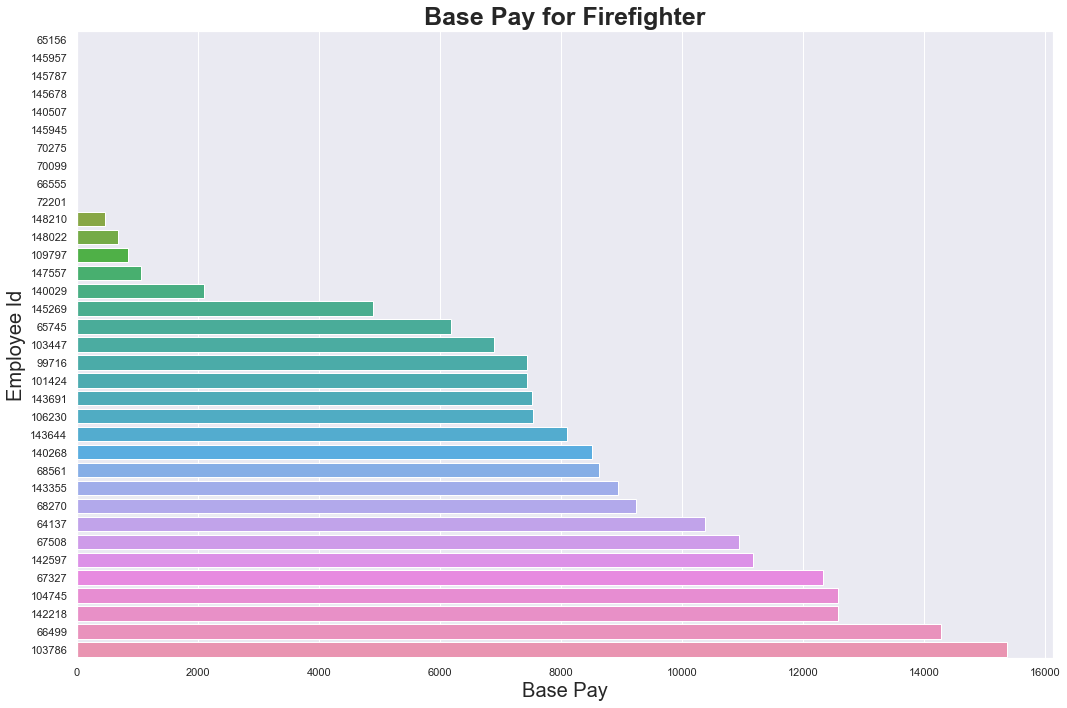

In [68]:
dataframe_info(firefighters_df, 10)

JUNIOR ENGINEER shape: (57, 13) 

Average base pay: $56384.23 USD

Maximum base pay: $79630.17 USD

Minimum base pay: $1253.5 USD

       Id       EmployeeName         JobTitle   BasePay  OvertimePay  \
39  24664          ANDY KWAN  JUNIOR ENGINEER  49508.35         0.00   
6   14594         IRENE CHAN  JUNIOR ENGINEER  79477.01         0.00   
19  17625     MELINDA HESPEN  JUNIOR ENGINEER  67554.44      1939.28   
38  23678    JONATHAN KOCHER  JUNIOR ENGINEER  52570.69         0.00   
5   14381       MICHAEL TRAN  JUNIOR ENGINEER  76437.94      3698.05   
27  18533       JENNA CASTRO  JUNIOR ENGINEER  67271.01         0.00   
14  15636       MAN KEUNG NG  JUNIOR ENGINEER  74028.98      1431.14   
7   14595        DAVID YOUNG  JUNIOR ENGINEER  79477.01         0.00   
49  28979  CATALINA GONZALEZ  JUNIOR ENGINEER  22563.00         0.00   
48  28616  BIENVENIDO CLARIN  JUNIOR ENGINEER  25182.02         0.00   

    OtherPay Benefits  TotalPay  TotalPayBenefits  Year Notes         Agency

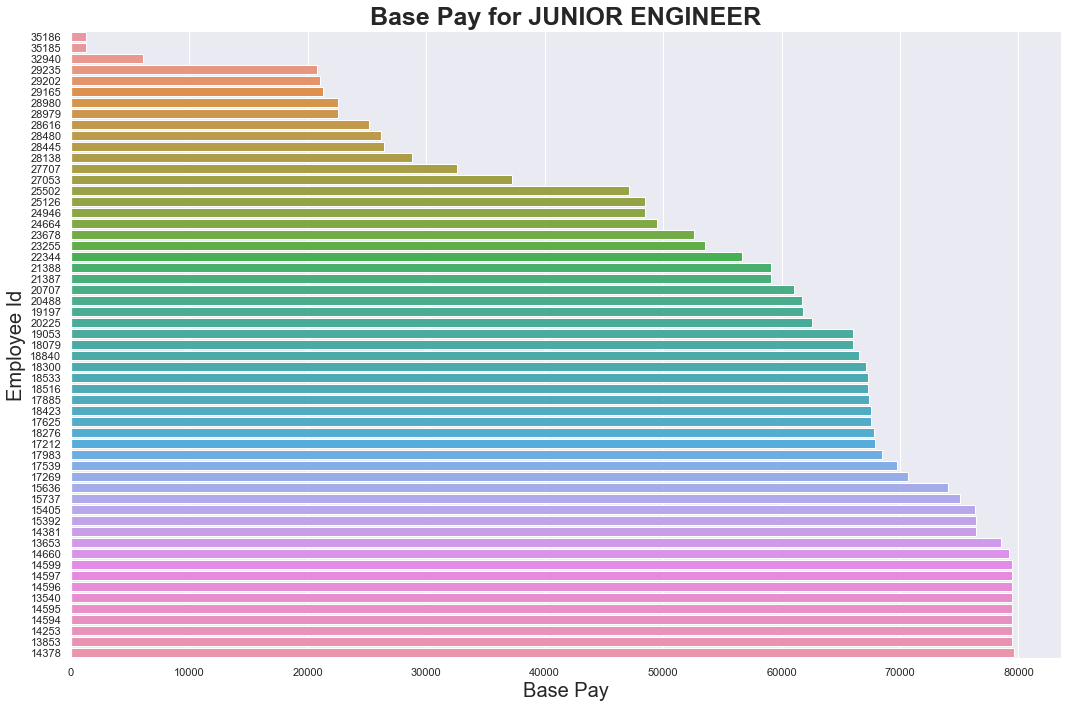

In [69]:
dataframe_info(junior_engineer_df, 10)

Public Defender shape: (3, 13) 

Average base pay: $220335.19 USD

Maximum base pay: $228243.61 USD

Minimum base pay: $207643.84 USD

       Id     EmployeeName         JobTitle    BasePay  OvertimePay  OtherPay  \
0   36349   Jeffrey Adachi  Public Defender  207643.84            0         0   
1   73058  Jeffrey  Adachi  Public Defender  228243.61            0         0   
2  110642   Jeffrey Adachi  Public Defender  225118.12            0         0   

   Benefits   TotalPay  TotalPayBenefits  Year Notes         Agency Status  
0  62778.68  207643.84         270422.52  2012        San Francisco         
1  66141.45  228243.61         294385.06  2013        San Francisco         
2  71225.59  225118.12         296343.71  2014        San Francisco     FT  


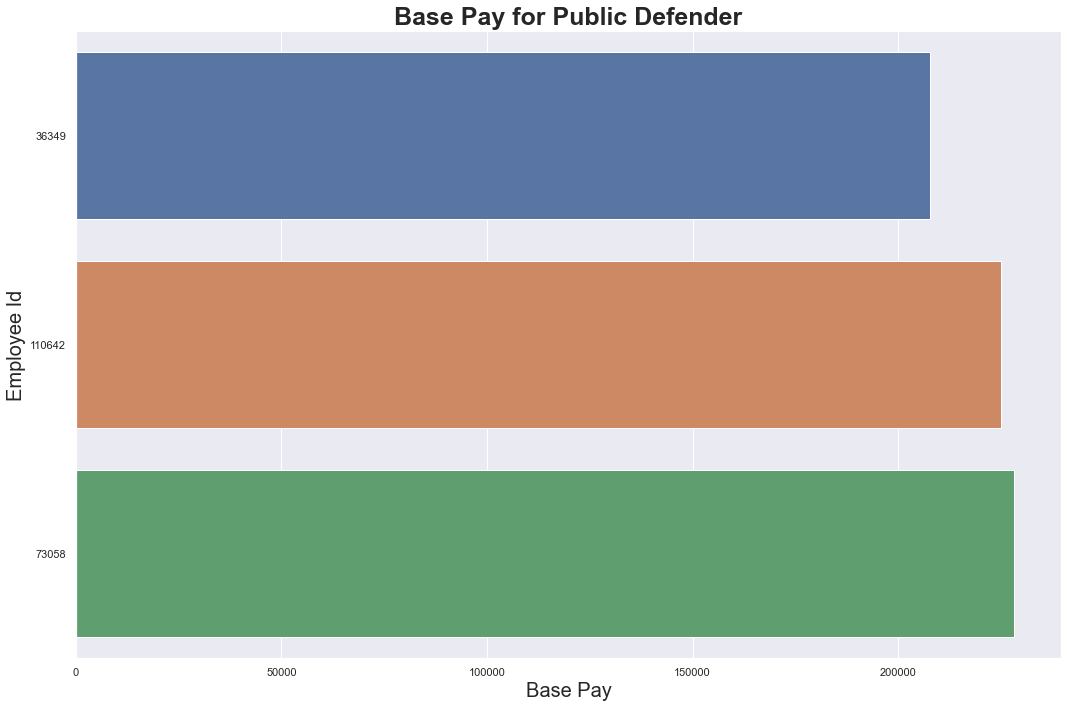

In [70]:
dataframe_info(public_defender_df, 3)

Asphalt Worker shape: (58, 13) 

Average base pay: $45386.68 USD

Maximum base pay: $63683.5 USD

Minimum base pay: $1228.8 USD

        Id           EmployeeName        JobTitle   BasePay  OvertimePay  \
8    58856           Gregory Hash  Asphalt Worker  55156.75       924.73   
55  141553      Salvador R Franco  Asphalt Worker  13364.25       578.60   
7    58164  Christopher Solorzano  Asphalt Worker  55450.49      2831.16   
15   64668      Maurice Broussard  Asphalt Worker  23480.00      3638.61   
29   96578         Gregory S Hash  Asphalt Worker  57140.00      1943.28   
45  131604        James J Mcgarty  Asphalt Worker  63043.00         0.00   
51  135507           Ronel Videau  Asphalt Worker  51570.25       869.75   
16   65554           Jerri Vinson  Asphalt Worker  26552.10       605.74   
6    57916        Ricardo Limjoco  Asphalt Worker  57724.12       792.65   
14   64469            Jacob Nicol  Asphalt Worker  26190.15       416.46   

    OtherPay  Benefits  TotalPay  

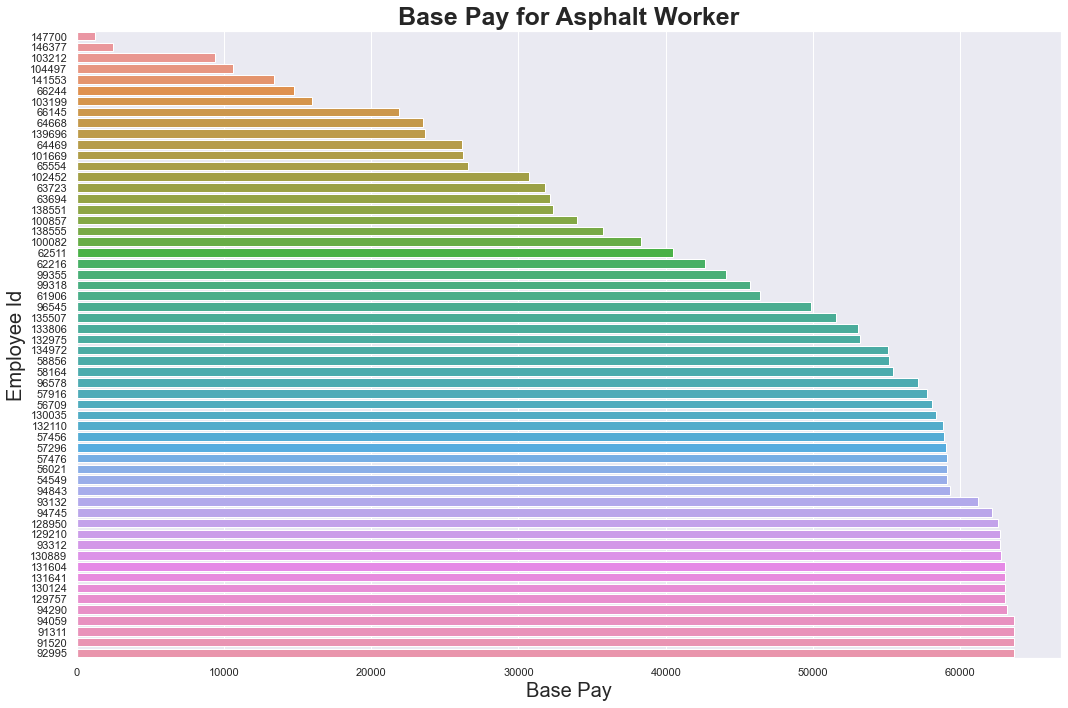

In [71]:
dataframe_info(asphalt_worker_df, 10)

WATERSHED KEEPER shape: (22, 13) 

Average base pay: $56797.1 USD

Maximum base pay: $60375.5 USD

Minimum base pay: $27024.0 USD

       Id        EmployeeName          JobTitle   BasePay  OvertimePay  \
21  26259           MARK HALL  WATERSHED KEEPER  27024.00       382.72   
2   16740          HANS BAYER  WATERSHED KEEPER  60206.68      2952.04   
15  20492     JAMES BARKENHUS  WATERSHED KEEPER  58137.78      2968.20   
11  20136       RONALD SEEVER  WATERSHED KEEPER  60206.60      2630.02   
5   19456  FREDERICK PETERSEN  WATERSHED KEEPER  60206.60      4652.76   
14  20226        DAVID RIFFEL  WATERSHED KEEPER  60193.00      2346.95   
3   18387       MICHAEL BYRNE  WATERSHED KEEPER  60375.50      5271.97   
16  20749    TIMOTHY SULLIVAN  WATERSHED KEEPER  60206.61       697.05   
18  21539      JESUS GUERRERO  WATERSHED KEEPER  56098.60      2691.69   
13  20210       ROBERT SLATER  WATERSHED KEEPER  60193.00      2419.17   

    OtherPay Benefits  TotalPay  TotalPayBenefits  Yea

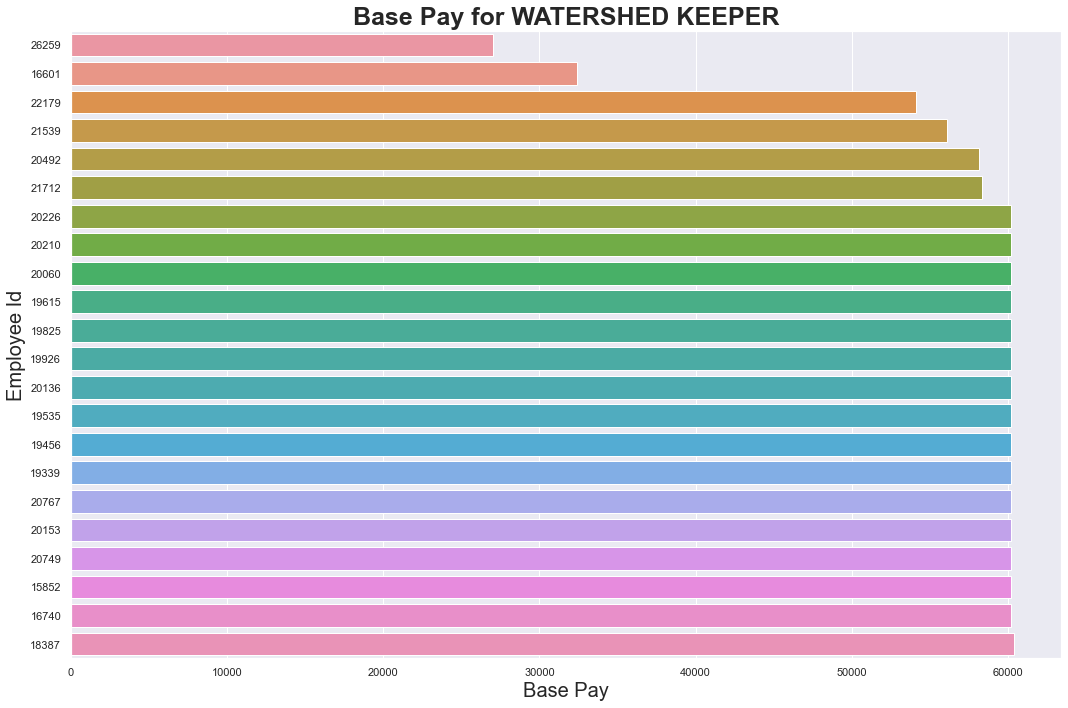

In [72]:
dataframe_info(watershed_keeper_df,10)

CHILD SUPPORT OFFICER III shape: (16, 13) 

Average base pay: $72566.18 USD

Maximum base pay: $83156.92 USD

Minimum base pay: $29790.24 USD

       Id          EmployeeName                   JobTitle   BasePay  \
9   14476      STEPHANIE MARTIN  CHILD SUPPORT OFFICER III  79900.96   
3   14287        JUDITH MERRILL  CHILD SUPPORT OFFICER III  79900.98   
1   13464  FREDA RANDOLPH GLENN  CHILD SUPPORT OFFICER III  83156.91   
6   14325           MARK TORRES  CHILD SUPPORT OFFICER III  79901.01   
10  14478        VANETTA DUNLAP  CHILD SUPPORT OFFICER III  79900.96   
11  15278            LOUIS HUPP  CHILD SUPPORT OFFICER III  76911.99   
13  19647    COLLEEN MCLAUGHLIN  CHILD SUPPORT OFFICER III  64283.46   
15  27428         FIDELA MARTEL  CHILD SUPPORT OFFICER III  34504.63   
14  27336         KATHRYN MOORE  CHILD SUPPORT OFFICER III  29790.24   
12  17479         MARY ALATORRE  CHILD SUPPORT OFFICER III  69921.84   

    OvertimePay  OtherPay Benefits  TotalPay  TotalPayBenefits  

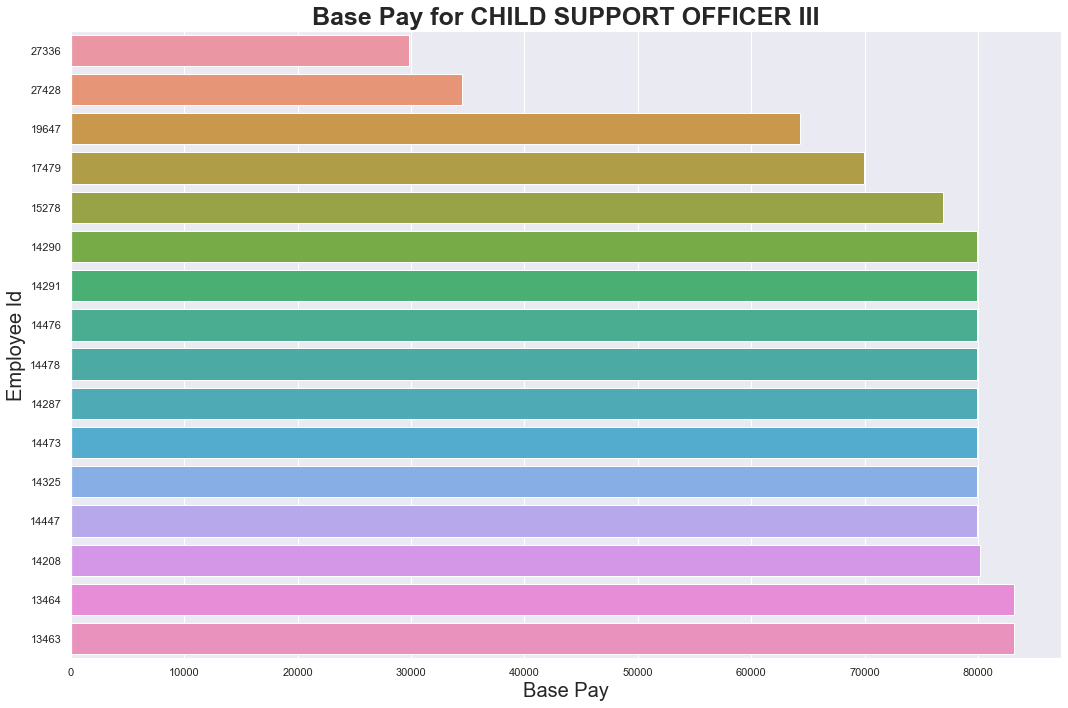

In [73]:
dataframe_info(df, 10)